# <font color = 'green'> Trabalho de Curso - Modelo de Classificação</font>
<hr style='border: 2px solid green;'>

<img width='600px' src='./Dados/imagem_2024-03-19_220050116.png'>


# <font color = 'orange'> Problema: Escopo do Modelo de Regressão Logistica</font>
<hr style='border: 2px solid orange;'>

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    Neste modelo de predição, os dados utilizados possuem um escopo muito específico. O conjunto de dados contém 768 amostras, todas provenientes de mulheres com pelo menos 21 anos de idade e de herança indígena Pima. Esse recorte restrito torna o modelo inadequado para aplicação em situações fora desse contexto específico. No entanto, é importante destacar que o objetivo principal deste trabalho neste momento, não é criar uma ferramenta de diagnóstico para o público em geral, mas demonstrar que a criação de tal ferramenta é possível e como faze-la.
</ul>
    

# <font color = 'deepskyblue'> Sobre o Dataset</font>
<hr style='border: 2px solid deepskyblue;'>

### Fonte: https://www.kaggle.com/datasets/whenamancodes/predict-diabities?rvi=1

### Informações:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Este conjunto de dados é originalmente do National Institute of Diabetes and Digestive and Kidney Diseases. </p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem diabetes, com base em certas medidas diagnósticas incluídas no conjunto de dados. Foram impostas várias restrições na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade e de herança indiana Pima.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>No arquivo (.csv) deste conjunto de dados, encontramos várias variáveis, algumas delas são independentes (várias variáveis preditoras médicas) e apenas uma variável dependente alvo (Resultado).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Gravidezes</b> -  Expressa o número de gravidezes </li>
    <li><b>Glicose</b> - Expressa o nível de glicose no sangue</li>
    <li><b>Pressão Sanguínea Diastólica (mmHg) </b> - Expressa a medição da pressão sanguínea</li>
    <li><b>Espessura da Pele</b> - Expressar a espessura da pele</li>
    <li><b>Insulina</b> - Expressa o nível de insulina no sangue</li>
    <li><b>IMC</b> - Expressa o Índice de Massa Corporal</li>
    <li><b>Predisposição Genética</b> - Expressar a probabilidade de diabetes com base no histórico familiar</li>
    <li><b>Idade</b>- Expressa a idade</li>
    <li><b>Resultado</b> - Expressa o resultado final, onde: Sim[1] e Não[0]</li>
</ul>


# <font color = 'deepskyblue'> Iniciando</font>
<hr style='border: 2px solid deepskyblue;'>

## Importações

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Importa as bibliotecas necessarias para leitura, vizualização e manipulação de dados em um Dataframe</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

## Leitura

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Realizando a leitura do arquivo CSV chamado "diabetes.csv" e carregando-o em um DataFrame usando a biblioteca pandas em Python. O DataFrame resultante é armazenado na variável df.</p>

In [2]:
dados = pd.read_csv('./Dados/diabetes.csv')

## Visualização

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Vizualização parcial dos dados</p>

In [3]:
dados.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## Verificando o tamanho do Dataset

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Retorna quantas linhas e colunas o dataframe possui</p>

In [4]:
dados.shape

(768, 9)

# <font color = 'deepskyblue'> Modificações</font>
<hr style='border: 2px solid deepskyblue;'>

## Modificando os títulos das colunas

In [5]:
dados.rename(columns={
    'Pregnancies': 'gravidezes',
    'Glucose': 'glicose',
    'BloodPressure': 'pressao_sanguinea',
    'SkinThickness': 'espessura_pele',
    'Insulin': 'insulina',
    'BMI': 'IMC',
    'DiabetesPedigreeFunction': 'predisposicao_genetica',
    'Age': 'idade',
    'Outcome': 'resultado'
}, inplace=True)

## Conversão Espessura da Pele para milimetros

In [6]:
dados['espessura_pele'] = dados['espessura_pele']/10

# <font color = 'deepskyblue'> Análises Preliminares</font>
<hr style='border: 2px solid deepskyblue;'>

## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'> Nesta tabela descritiva, é fornecido dados e comportamentos preliminares das variaveis.</p>

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>count</b> -  Conta a quantidade de amostras com valor não nulo. </li>
    <li><b>media</b> - Mostra o valor médio dessa variável.</li>
    <li><b>std</b> - Determina o desvio-padrão, uma medida de dispersão em torno da média.</li>
    <li><b>min</b> - Indica o valor minimo da variável.</li>
    <li><b>25%</b> -  Indica o valor máximo das primeiras 25% amostras, ou seja, o valor abaixo do qual 25% dos dados estão.</li>
    <li><b>50%</b> -  Indica o valor máximo das primeiras 50% amostras, ou seja, a mediana.</li>
    <li><b>75%</b> - Indica o valor máximo das primeiras 75% amostras, ou seja, o valor abaixo do qual 75% dos dados estão.</li>
    <li><b>max</b> - Indica o valor maximo da variável.</li>
</ul>


In [7]:
dados.describe().round(2)

,gravidezes,glicose,pressao_sanguinea,espessura_pele,insulina,IMC,predisposicao_genetica,idade,resultado
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,2.05,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,1.60,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,2.30,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,3.20,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,9.90,846.00,67.10,2.42,81.00,1.00


## Matriz de Correlação

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>O coeficiente de correlação é uma medida estatística que avalia a força e a direção de uma relação linear entre duas variáveis. Seu valor varia entre -1 e +1:</p>
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li> Um valor de -1 indica uma associação negativa perfeita, o que significa que à medida que uma variável aumenta, a outra diminui de forma linear.</li>
    <li> Um valor de +1 indica uma associação positiva perfeita, indicando que à medida que uma variável aumenta, a outra também aumenta de forma linear.</li>
    <li>Valores próximos de zero indicam uma associação fraca entre as variáveis.</li>
</ul>


In [8]:
dados.corr().round(4)

,gravidezes,glicose,pressao_sanguinea,espessura_pele,insulina,IMC,predisposicao_genetica,idade,resultado
gravidezes,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
glicose,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
pressao_sanguinea,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
espessura_pele,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
insulina,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
IMC,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
predisposicao_genetica,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
idade,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
resultado,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


# <font color = 'orange'> Problema: Tratamento de Dados</font>
<hr style='border: 2px solid orange;'>

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    O tratamento de dados é um dos primeiros desafios a serem enfrentados na análise de dados, sendo que problemas como valores ausentes, valores irreais ou fora de escala são comuns. Dado que o modelo de regressão logística é treinado com esses dados, é essencial que os dados sejam devidamente tratados e consolidados.
</ul>
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    Na análise dos nossos dados, foram identificadas várias irregularidades. As variáveis glicose, pressão arterial, espessura da pele, insulina e IMC apresentaram valores iguais a zero, o que é biologicamente impossível. Destaca-se que as variáveis espessura da pele e insulina apresentaram 227 e 374 amostras, respectivamente, com valores iguais a zero ou nulos, resultando em uma baixa correlação com a variável dependente, Resultado, de 0,07 e 0,13, respectivamente. Para resolver essa questão, decidiu-se remover essas variáveis da análise.
</ul>
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    Por outro lado, as variáveis pressão arterial, glicose e IMC apresentaram 35, 5 e 11 amostras, respectivamente, com valores nulos ou ausentes. Para lidar com essas inconsistências, utilizou-se um modelo de imputação, no qual valores coerentes foram estimados com base nos dados vizinhos para substituir os valores ausentes.
</ul>

# <font color = 'deepskyblue'> Tratando de Dados</font>
<hr style='border: 2px solid deepskyblue;'>

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valores Nulos ou Ausentes</b> - Glicose, Pressão Sanguínea, Espessura da Pele, Insulina e IMC apresentam dados com valores mínimos iguais a 0.</li>
    <li><b>Correlação Baixa</b> - Baixa correlação das variáveis independentes Pressão Sanguínea, Espessura da Pele e Insulina com a variável dependente Resultado.</li>
    <li><b>Possíveis Outliers</b> - Possíveis outliers em Pressão Sanguínea, Espessura da Pele e Insulina.</li>
</ul>


## Excluindo Variáveis

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> As variáveis <b>Espessura da Pele</b> e <b>Insulina</b> possuem baixa correlação com a variável dependente <b>Resultado</b>. Um dos possíveis motivos é a quantidade de pacientes onde o valor dessas variáveis no banco de dados é 0, sendo 227 pacientes em <b>Espessura da Pele</b> e 374 pacientes em <b>Insulina</b>. Isso possivelmente indica a ausência de exames. Por conta disso, é viável a exclusão dessas variáveis para simplificar a análise e tratamento de dados futuros.</p>


In [9]:
result = dados.query("`espessura_pele` == 0")
result.count()

gravidezes                227
glicose                   227
pressao_sanguinea         227
espessura_pele            227
insulina                  227
IMC                       227
predisposicao_genetica    227
idade                     227
resultado                 227
dtype: int64

In [10]:
result = dados.query("`insulina` == 0")
result.count()

gravidezes                374
glicose                   374
pressao_sanguinea         374
espessura_pele            374
insulina                  374
IMC                       374
predisposicao_genetica    374
idade                     374
resultado                 374
dtype: int64

In [11]:
colunas_para_excluir = ['espessura_pele', 'insulina']
dados = dados.drop(colunas_para_excluir, axis = 1)
dados.head(10)

,gravidezes,glicose,pressao_sanguinea,IMC,predisposicao_genetica,idade,resultado
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
5,5,116,74,25.6,0.201,30,0
6,3,78,50,31.0,0.248,26,1
7,10,115,0,35.3,0.134,29,0
8,2,197,70,30.5,0.158,53,1
9,8,125,96,0.0,0.232,54,1


## Tratando dados com valores 0 ou ausentes com  imputação baseada em modelos

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A imputação baseada em modelos é uma técnica para lidar com valores ausentes em conjuntos de dados. Envolve a construção de um modelo com os dados completos e o uso desse modelo para prever os valores ausentes com base nas informações disponíveis. Essas previsões são então utilizadas para substituir os valores ausentes, completando assim o conjunto de dados. Essa abordagem permite aproveitar a relação entre as variáveis para estimar os valores ausentes, tornando-a uma maneira eficaz de lidar com dados incompletos.</p>


In [12]:
result = dados.query("pressao_sanguinea == 0")
result.count()

gravidezes                35
glicose                   35
pressao_sanguinea         35
IMC                       35
predisposicao_genetica    35
idade                     35
resultado                 35
dtype: int64

In [13]:
result = dados.query("glicose == 0")
result.count()

gravidezes                5
glicose                   5
pressao_sanguinea         5
IMC                       5
predisposicao_genetica    5
idade                     5
resultado                 5
dtype: int64

In [14]:
result = dados.query("`IMC` == 0")
result.count()

gravidezes                11
glicose                   11
pressao_sanguinea         11
IMC                       11
predisposicao_genetica    11
idade                     11
resultado                 11
dtype: int64

In [15]:
colunas_para_substituir = ['pressao_sanguinea','glicose', 'IMC']
dados[colunas_para_substituir] = dados[colunas_para_substituir].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=100)
dados_imputed = pd.DataFrame(imputer.fit_transform(dados), columns=dados.columns)
dados = dados_imputed

## Revendo a descrição e correlação com os valores corrigidos


In [16]:
dados.describe().round(2)

,gravidezes,glicose,pressao_sanguinea,IMC,predisposicao_genetica,idade,resultado
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.66,72.33,32.44,0.47,33.24,0.35
std,3.37,30.45,12.13,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,32.12,0.37,29.00,0.00
75%,6.00,140.25,80.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,67.10,2.42,81.00,1.00


In [17]:
dados.corr().round(4)

,gravidezes,glicose,pressao_sanguinea,IMC,predisposicao_genetica,idade,resultado
gravidezes,1.0000,0.1294,0.2106,0.0228,-0.0335,0.5443,0.2219
glicose,0.1294,1.0000,0.2303,0.2349,0.1380,0.2682,0.4946
pressao_sanguinea,0.2106,0.2303,1.0000,0.2910,0.0031,0.3339,0.1736
IMC,0.0228,0.2349,0.2910,1.0000,0.1536,0.0281,0.3141
predisposicao_genetica,-0.0335,0.1380,0.0031,0.1536,1.0000,0.0336,0.1738
idade,0.5443,0.2682,0.3339,0.0281,0.0336,1.0000,0.2384
resultado,0.2219,0.4946,0.1736,0.3141,0.1738,0.2384,1.0000


# <font color = 'orange'> Problema: Vizualização dos Dados</font>
<hr style='border: 2px solid orange;'>

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>
A visualização de dados exclusivamente por meio de números pode ser contraintuitiva. A utilização de representações gráficas oferece uma maior intuição e facilita a compreensão das informações. Portanto, a seguir, serão apresentados gráficos em diferentes formatos, que permitirão uma análise mais clara e intuitiva dos dados.
</p>

# <font color = 'deepskyblue'> Vizualização de Comportamentos das Variáveis em Gráficos</font>
<hr style='border: 2px solid deepskyblue;'>

## Gráfico Pairplot

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>O gráfico pairplot mostra as relações entre múltiplas variáveis em um conjunto de dados. Ele cria uma matriz de gráficos onde cada variável numérica é plotada em relação a todas as outras variáveis numéricas, e os gráficos na diagonal principal mostram a distribuição univariada de cada variável. Mas no nosso caso usaremos apenas as váriavéis em relação ao Resultado</p>
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Grafico Principal:</b> Mostra um gráfico de dispersão entre duas variáveis diferentes. Cada ponto no gráfico de dispersão representa uma observação no conjunto de dados, e a posição do ponto mostra os valores das duas variáveis para essa observação.
</li>
    <li><b>Região de Ajuste: </b> Além do gráfico de dispersão, uma linha de regressão linear é ajustada aos pontos para mostrar a tendência geral dos dados. Isso é útil para identificar padrões lineares entre as variáveis.</li>

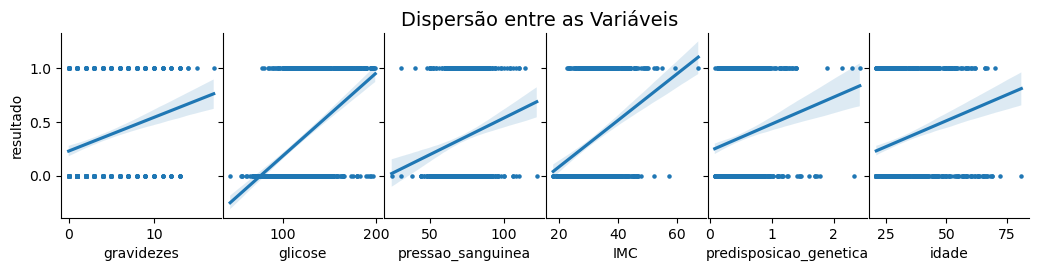

In [18]:
ax = sns.pairplot(dados, y_vars='resultado', x_vars=['gravidezes', 'glicose', 'pressao_sanguinea', 'IMC', 'predisposicao_genetica', 'idade'], height=10, kind = 'reg',
                 plot_kws={'scatter_kws': {'s': 5, 'alpha': 1}})
ax.figure.set_size_inches(10,2)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=14, y=1.1)
ax

## Gráfico Heatmap

<p style='font-size: 18px; line-height: 2; margin: 5px 5px;'>
    Um gráfico de heatmap (ou mapa de calor) é uma visualização gráfica que utiliza cores para representar a intensidade ou a magnitude dos valores em uma matriz de dados. Cada célula da matriz é preenchida com uma cor que corresponde ao valor dos dados naquela posição, permitindo identificar facilmente padrões, tendências e anomalias nos dados.
Componentes de um Heatmap: </p>

<ul style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>
    <li><b>Eixos:</b> Geralmente, um heatmap tem dois eixos: o eixo X e o eixo Y. Cada eixo representa uma variável ou categoria.</li>
    <li><b>Células:</b> As células no cruzamento dos eixos são preenchidas com cores que indicam o valor dos dados. A intensidade da cor reflete a magnitude do valor.</li>
    <li><b>Escala de Cores:</b> Uma barra de cores é usada para interpretar os valores representados. Por exemplo, em um heatmap de temperaturas, o azul pode indicar valores mais baixos, e o vermelho, valores mais altos.
</li> 
</ul>

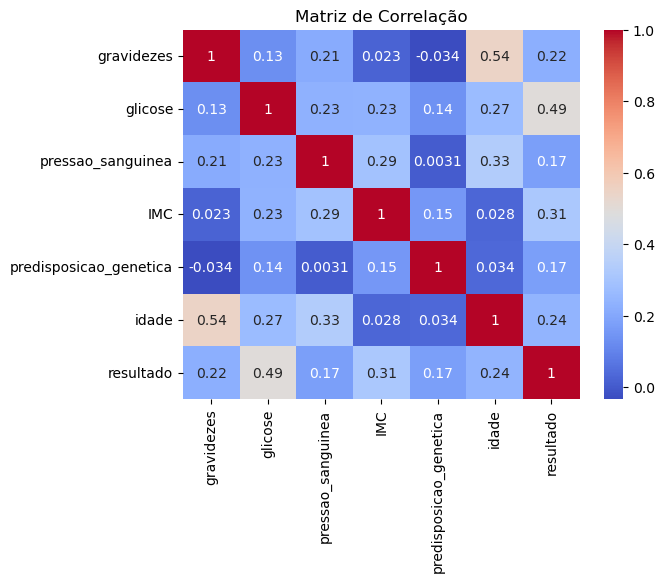

In [19]:
correlation_matrix = dados.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Gráfico Scatterplot e relplot

<p style='font-size: 18px; line-height: 2; margin: 5px 5px;'>
    <b>Scatterplot:</b> Um scatterplot exibe a relação entre duas variáveis numéricas usando pontos plotados em um gráfico, cada ponto representa um par de valores das variáveis. Mostra padrões, tendências (correlação positiva ou negativa) e outliers.
    
<p style='font-size: 18px; line-height: 2; margin: 5px 5px;'>
    <b>Relplot:</b> O relplot é uma função de alto nível do Seaborn que cria gráficos de relação, incluindo scatterplots e lineplots. Pode produzir scatterplots ou lineplots, e pode ser facilmente configurado para criar gráficos facetados (múltiplos gráficos em uma única visualização) para análises mais detalhadas. Além de plotar gráficos de dispersão, pode incorporar múltiplas variáveis categóricas usando cores, tamanhos ou estilos, permitindo a criação de subplots.

</p> 



<Axes: xlabel='glicose', ylabel='IMC'>

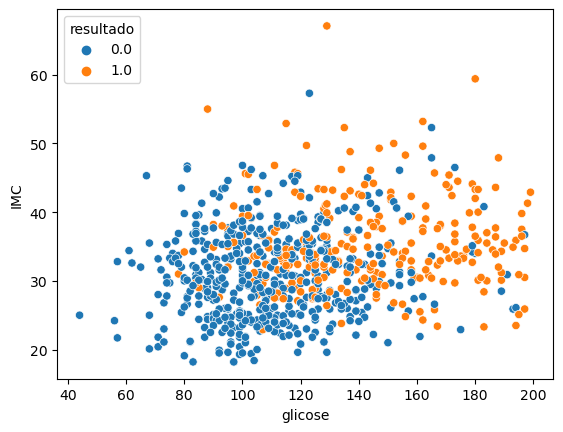

In [20]:
sns.scatterplot(x = "glicose", y = "IMC", data = dados, hue = "resultado")

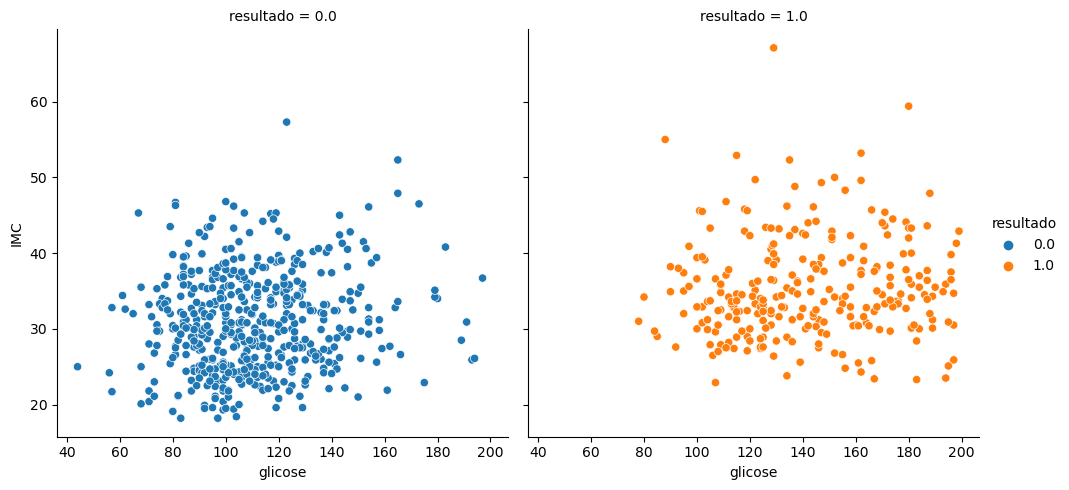

In [21]:
sns.relplot(x = "glicose", y = "IMC", data = dados, hue = "resultado", col = "resultado")

<Axes: xlabel='glicose', ylabel='gravidezes'>

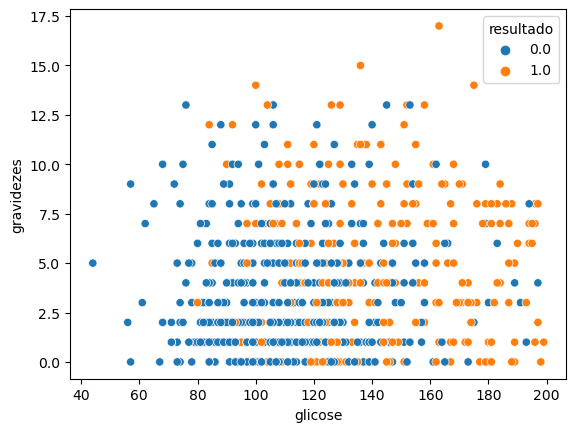

In [22]:
sns.scatterplot(x = "glicose", y = "gravidezes", data = dados, hue = "resultado")

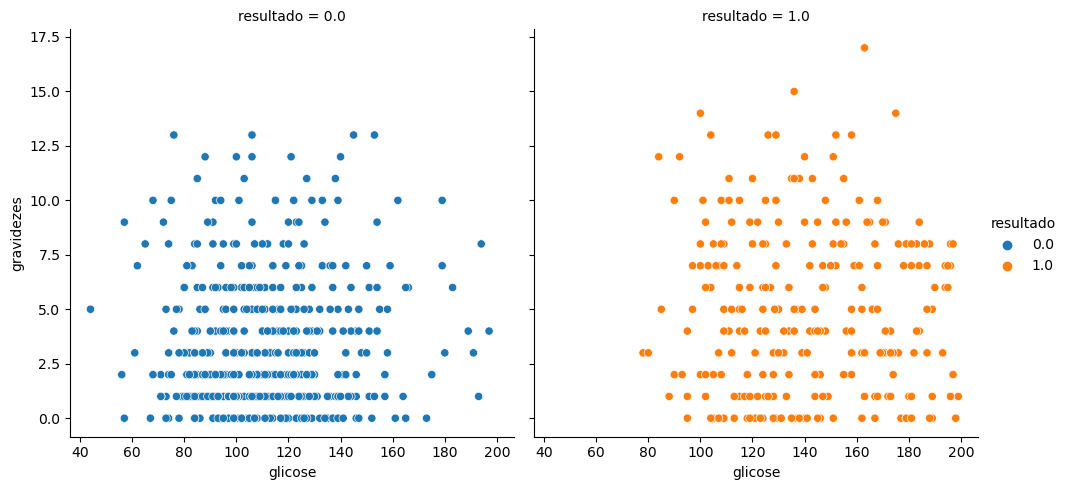

In [23]:
sns.relplot(x = "glicose", y = "gravidezes", data = dados, hue = "resultado", col = 'resultado')

## Gráfico de Barras

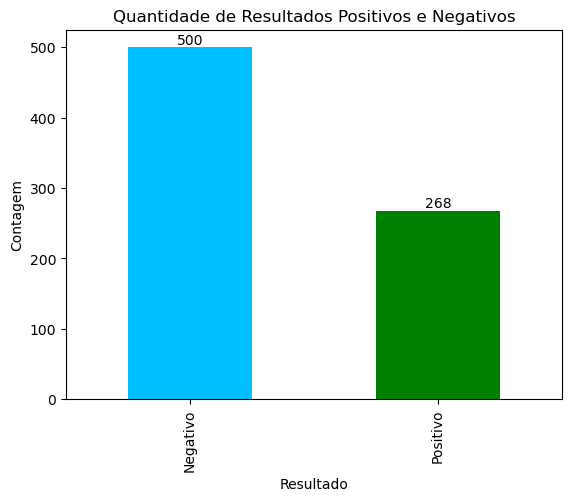

In [24]:
resultado_counts = dados['resultado'].value_counts()
resultado_counts.plot(kind='bar', color = ['deepskyblue', 'g'])

plt.title('Quantidade de Resultados Positivos e Negativos', fontsize = 12)
plt.xlabel('Resultado', fontsize = 10)
plt.ylabel('Contagem', fontsize = 10)
plt.xticks([0, 1], ['Negativo', 'Positivo'])

for i in range(len(resultado_counts)):
    plt.text(i, resultado_counts[i], str(resultado_counts[i]), ha='center', va='bottom')

plt.show()

##  Boxplots

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>O Boxplot, também conhecido como diagrama de caixa, é uma ferramenta gráfica utilizada principalmente na análise estatística para representar a distribuição de um conjunto de dados e identificar possíveis valores atípicos (outliers). Ele é composto por cinco estatísticas resumidas:</p>
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Primeiro quartil (Q1):</b> É o valor que representa o limite entre os 25% dos dados menores e os 75% maiores.
</li>
    <li><b>Mediana(Q2):</b> É o valor que divide o conjunto de dados ao meio, onde metade dos dados está acima e metade está abaixo deste valor.</li>
    <li><b>Terceiro quartil (Q3):</b> É o valor que representa o limite entre os 75% dos dados menores e os 25% maiores.
</li>
    <li><b>Intervalo Interquartil (IIQ):</b>  É uma medida de dispersão estatística que representa a variação dos dados em torno da mediana.</li>
    <li><b>Outliers:</b> Valores que estão significativamente distantes dos demais valores do conjunto de dados.</li>
</ul>





<img width='600px' src='./Dados/Box-Plot.png'>

<Axes: title={'center': 'Boxplot da Quantidade de Gravidez em Relação ao Diagnostico de Diabetes'}, xlabel='Quantidade de Gravidezes', ylabel='Diagnostico de diabetes'>

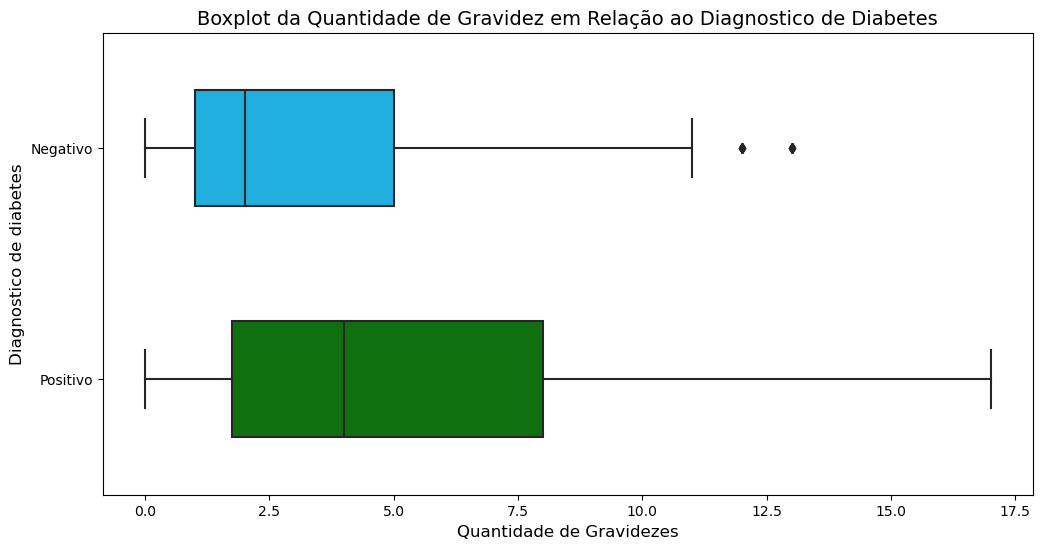

In [25]:
cores = ["deepskyblue", "g"]
ax = sns.boxplot(x = 'gravidezes', y = 'resultado', data = dados, orient = 'h', width = 0.5, palette = cores)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da Quantidade de Gravidez em Relação ao Diagnostico de Diabetes", fontsize = (14))
ax.set_xlabel('Quantidade de Gravidezes', fontsize = 12)
ax.set_ylabel('Diagnostico de diabetes', fontsize = 12)
plt.yticks([0, 1], ['Negativo', 'Positivo'])
ax

<Axes: title={'center': 'Boxplot do Valor da Glicose em Relação ao Diagnostico de Diabetes'}, xlabel='Valor da Glicose', ylabel='Diagnostico de diabetes'>

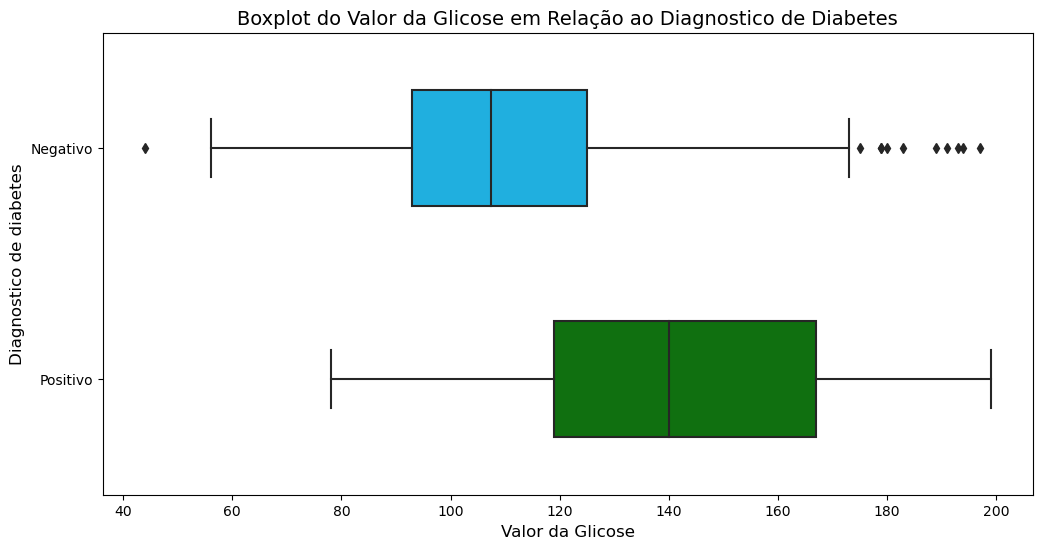

In [26]:
cores = ["deepskyblue", "g"]
ax = sns.boxplot(x = 'glicose', y = 'resultado', data = dados, orient = 'h', width = 0.5, palette = cores)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot do Valor da Glicose em Relação ao Diagnostico de Diabetes", fontsize = (14))
ax.set_xlabel('Valor da Glicose', fontsize = 12)
ax.set_ylabel('Diagnostico de diabetes', fontsize = 12)
plt.yticks([0, 1], ['Negativo', 'Positivo'])
ax

<Axes: title={'center': 'Boxplot do IMC em Relação ao Diagnostico de Diabetes'}, xlabel='IMC', ylabel='Diagnostico de diabetes'>

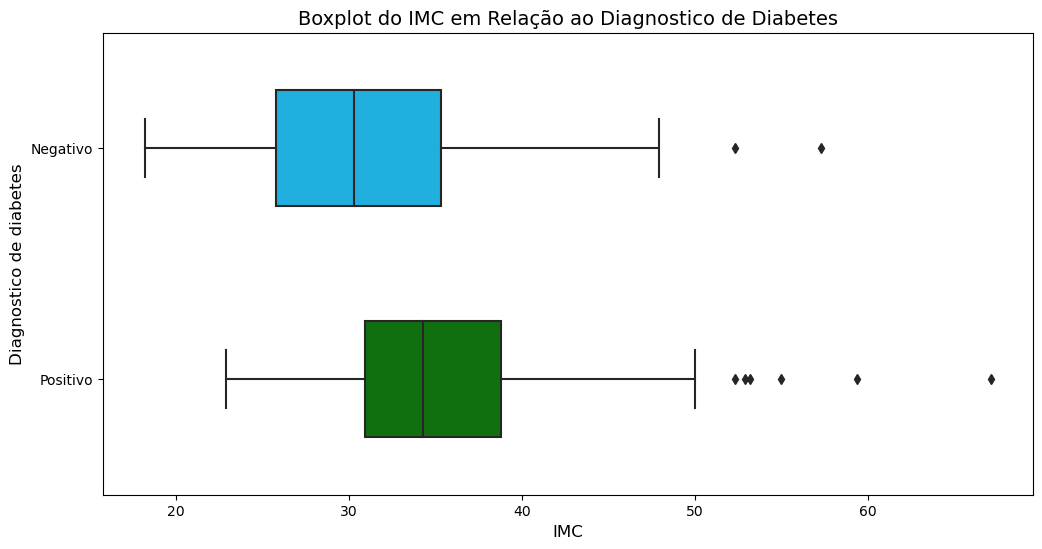

In [27]:
cores = ["deepskyblue", "g"]
ax = sns.boxplot(x = 'IMC', y = 'resultado', data = dados, orient = 'h', width = 0.5, palette = cores)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot do IMC em Relação ao Diagnostico de Diabetes", fontsize = (14))
ax.set_xlabel('IMC', fontsize = 12)
ax.set_ylabel('Diagnostico de diabetes', fontsize = 12)
plt.yticks([0, 1], ['Negativo', 'Positivo'])
ax

<Axes: title={'center': 'Boxplot da Predisposição Genética em Relação ao Diagnostico de Diabetes'}, xlabel='Predisposição Genética', ylabel='Diagnostico de diabetes'>

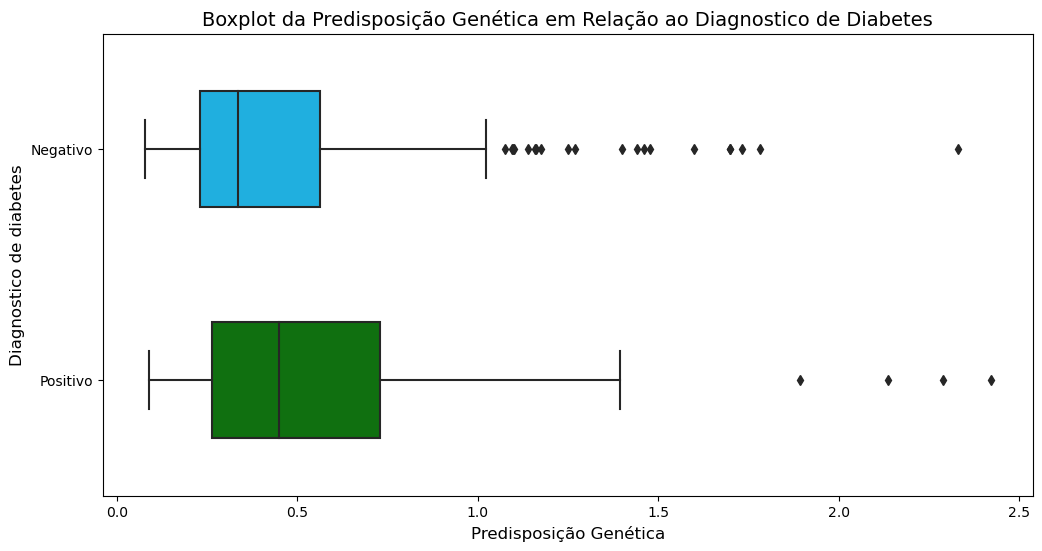

In [28]:
cores = ["deepskyblue", "g"]
ax = sns.boxplot(x = 'predisposicao_genetica', y = 'resultado', data = dados, orient = 'h', width = 0.5, palette = cores)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da Predisposição Genética em Relação ao Diagnostico de Diabetes", fontsize = (14))
ax.set_xlabel('Predisposição Genética', fontsize = 12)
ax.set_ylabel('Diagnostico de diabetes', fontsize = 12)
plt.yticks([0, 1], ['Negativo', 'Positivo'])
ax

<Axes: title={'center': 'Boxplot da Idade em Relação ao Diagnostico de Diabetes'}, xlabel='Idade', ylabel='Diagnostico de diabetes'>

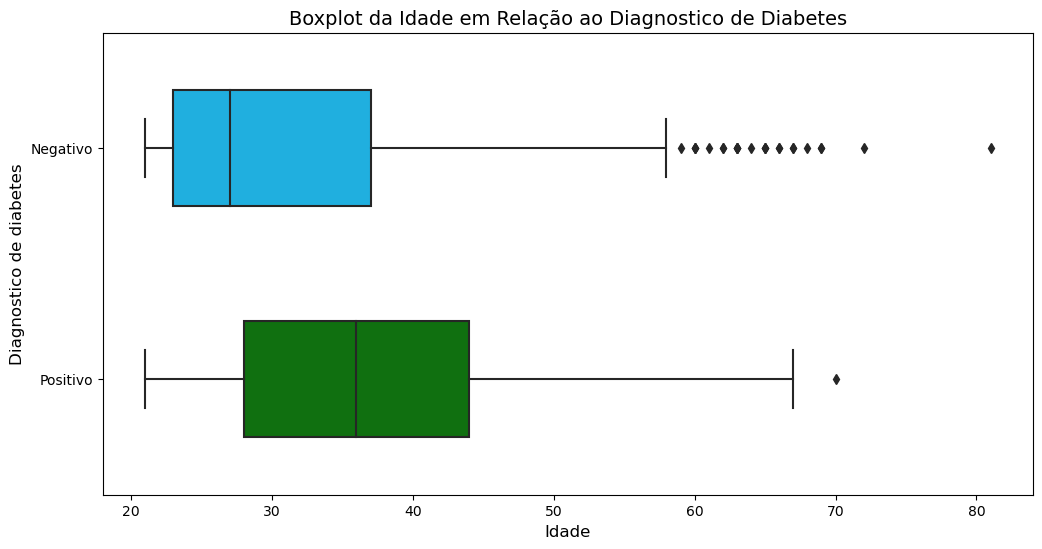

In [29]:
cores = ["deepskyblue", "g"]
ax = sns.boxplot(x = 'idade', y = 'resultado', data = dados, orient = 'h', width = 0.5, palette = cores)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da Idade em Relação ao Diagnostico de Diabetes", fontsize = (14))
ax.set_xlabel('Idade', fontsize = 12)
ax.set_ylabel('Diagnostico de diabetes', fontsize = 12)
plt.yticks([0, 1], ['Negativo', 'Positivo'])
ax

# <font color = 'deepskyblue'> Modelo de Classificação - Regressão Logistica: Criação, Analise e Previsões</font>
<hr style='border: 2px solid deepskyblue;'>

# <font color = 'deepskyblue'> Criação</font>
<hr style='border: 2px solid deepskyblue;'>

## Regressão Logistica

<p style='font-size: 18px; line-height: 2; margin: 5px 50px; text-align: justify;'>O modelo de regressão logística é um método estatístico usado para modelar a relação entre uma variável dependente binária (ou seja, que assume apenas dois valores, como sim ou não, 0 ou 1) e uma ou mais variáveis independentes. Ele estima a probabilidade de uma determinada observação pertencer a uma classe ou categoria específica.
</p>

### Fonte: (https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

<img width='1000px' src='./Dados/Captura de tela.png'>


## Importando Novas Bibliotecas

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

## Criando uma Series (pandas) para armazenar o Resultado (y)

In [31]:
y = dados['resultado']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [32]:
X = dados[['glicose', 'IMC','idade', "gravidezes"]]


# <font color = 'orange'> Problema: Acurácia da regressão logistica</font>
<hr style='border: 2px solid orange;'>

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>
O problema final é a acurácia e precisão do nosso modelo de Regressão Logistica, portando diversas tentativas e experimentos são realizados em busca do melhor resultado. O primeiro passo foi achar um random state de melhor resultado usando um laço for de 10000 repetições. Dessa forma escolhemos o melhor conjunto para dados de treino e teste, com uma acurácia de 87.01%
</p>

# Define the range of random_state values to test
random_states = np.arange(0, 10000, 1)  # Testa valores de 0 a 99999

melhores_resultados = []

for state in random_states:
    # Divide os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=state, stratify=y)
    
    # Treina o modelo
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)
    
    # Faz previsões e calcula a acurácia
    previsoes = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, previsoes) * 100

    melhores_resultados.append((state, acuracia))

# Encontra o random_state com a melhor acurácia
melhor_random_state, melhor_acuracia = max(melhores_resultados, key=lambda x: x[1])

print(f"Melhor random_state: {melhor_random_state}")
print(f"Acurácia correspondente: {melhor_acuracia:.2f}%")

### Melhor randon_state = 5176 (todas as variáveis)

## Criando os datasets de treino e de teste

In [53]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 5176, stratify = y)

## Criando o Modelo

In [54]:
modelo = LogisticRegression(random_state = 5176)

In [55]:
modelo.fit(X_train, y_train)

LogisticRegression(random_state=5176)

# <font color = 'deepskyblue'> Análise de Desempenho</font>
<hr style='border: 2px solid deepskyblue;'>

# <font color = 'orange'> Problema: Acurácia da regressão logistica</font>
<hr style='border: 2px solid orange;'>

<p style='font-size: 18px; line-height: 2; margin: 5px 5px; text-align: justify;'>
 A remoção ou adição das variavéis: predisposicao_genetica e pressa_sanquinea não aumentou ou diminuiu a precisão do modelo, dessa forma foram removidos do modelo de predição para ser simplificado
</p>

In [56]:
previsoes = modelo.predict(X_test)
acuracia = accuracy_score(y_test, previsoes) * 100

print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 81.82%


## Descobrindo o R²
<p style='font-size: 18px; line-height: 2; margin: 5px 50px; text-align: justify;'>O coeficiente de determinação(R²), é uma métrica que indica o quanto as variações na variável dependente podem ser explicadas pelas variáveis independentes incluídas no modelo.
</p>


In [37]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(6)))

R² = 0.76087


## Verificando o Relátorio de Classificação
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Precision (Precisão):</b> A precisão é a proporção de verdadeiros positivos (TP) em relação ao total de predições positivas (TP + FP). Em outras palavras, é a proporção de instâncias corretamente classificadas como pertencentes a uma determinada classe em relação ao número total de instâncias que o modelo previu como pertencentes a essa classe.</li>
    <li><b>Recall (Revocação):</b> A revocação é a proporção de verdadeiros positivos (TP) em relação ao total de instâncias que realmente pertencem a uma determinada classe (TP + FN). Em outras palavras, é a proporção de instâncias corretamente classificadas como pertencentes a uma determinada classe em relação ao número total de instâncias que realmente pertencem a essa classe.</li>
    <li><b>F1-score:</b> O F1-score é a média harmônica da precisão e da revocação. Ele fornece uma medida única do desempenho do modelo que leva em consideração tanto a precisão quanto a revocação. O F1-score é especialmente útil quando há um desequilíbrio nas classes.</li>
    <li><b>Support (Suporte):</b> O suporte é o número de instâncias reais de cada classe no conjunto de dados.</li>
    <li><b>Accuracy (Acurácia):</b> A acurácia é a proporção de predições corretas em relação ao total de instâncias no conjunto de dados.</li>
    <li><b>Macro avg:</b> A média não ponderada das métricas (precisão, revocação e F1-score) calculadas para cada classe. Cada classe é tratada de forma igual, independentemente do seu tamanho.</li>
    <li><b>Weighted avg:</b> A média ponderada das métricas calculadas para cada classe, onde cada classe é ponderada pela sua proporção no conjunto de dados.</li>
</ul>

<img width='400px' src='./Dados/Precisão_e_revocação.png'>

### Link da Imagem: https://medium.com/@mateuspdua/machine-learning-métricas-de-avaliação-acurácia-precisão-e-recall-d44c72307959

In [38]:
predictions = modelo.predict(X_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       201
         1.0       0.70      0.63      0.66       107

    accuracy                           0.78       308
   macro avg       0.75      0.74      0.75       308
weighted avg       0.77      0.78      0.77       308



## Curva ROC

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
   A curva ROC mostra a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) para vários limiares de classificação. Idealmente, você quer que a curva ROC suba rapidamente em direção ao canto superior esquerdo do gráfico, o que indica altas taxas de verdadeiros positivos e baixas taxas de falsos positivos, independentemente do limiar de classificação.
    
A Área sob a Curva ROC (AUC-ROC) é uma métrica comumente usada para resumir a performance do modelo de forma geral. Quanto maior a AUC-ROC, melhor o desempenho do modelo em distinguir entre classes positivas e negativas. Uma AUC-ROC de 0.5 indica um modelo que é essencialmente aleatório, enquanto um valor próximo a 1.0 indica um modelo quase perfeito. Em geral, uma AUC-ROC acima de 0.8 é considerada boa. <b> NOSSO CASO .92</b>
    
Em resumo, a curva ROC e a AUC-ROC fornecem uma maneira visual e quantitativa de avaliar a capacidade de um modelo de classificação de distinguir entre classes positivas e negativas em diferentes limiares de decisão.
</ul>

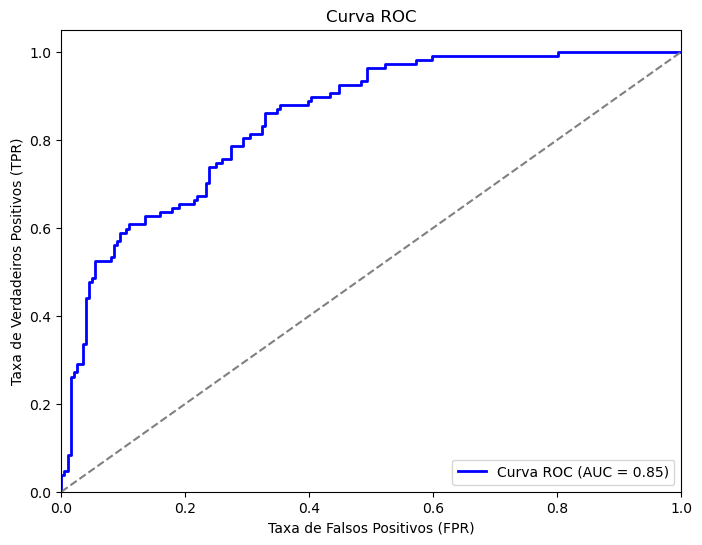

In [40]:
from sklearn.metrics import roc_curve, auc

# Fazer previsões no conjunto de teste
y_scores = modelo.predict_proba(X_test)[:,1]  # Probabilidade da classe positiva

# Calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR) usando roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


## Analise de coeficientes

In [41]:
modelo.intercept_

array([-8.89535746])

In [42]:
modelo.coef_

array([[0.03375681, 0.08667612, 0.02505517, 0.08718226]])

In [43]:
X.columns

Index(['glicose', 'IMC', 'idade', 'gravidezes'], dtype='object')

In [44]:
index = ['intercepto', 'Glicose', 'IMC', 'Idade', 'Gravidezes']

In [45]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
intercepto,-8.895357
Glicose,0.033757
IMC,0.086676
Idade,0.025055
Gravidezes,0.087182


<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
   <b>Intercepto:</b> Imagine o intercepto como o ponto de partida. Ele representa a chance inicial de algo acontecer quando todas as outras variáveis são zero. Se o intercepto for positivo, significa que já existe uma probabilidade de o evento ocorrer mesmo antes de considerarmos as outras variáveis.

   <b>Variáveis independentes (Glicose, IMC, Idade, Gravidezes):</b> Cada uma dessas variáveis contribui de forma diferente para o resultado final. Se o coeficiente de uma variável for positivo, isso significa que um aumento nessa variável aumentará a probabilidade do evento ocorrer. Se for negativo, significa que um aumento nessa variável diminuirá a probabilidade. Exemplo: um aumento de 1 unidade de IMC aumenta em 0.076924 o valor do intercepto.
</ul>

# <font color = 'deepskyblue'> Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid deepskyblue;'>

## Dados de entrada

In [46]:
entrada = X_test[0:1]
entrada

,glicose,IMC,idade,gravidezes
318,115.0,38.1,28.0,3.0


## Gerando Previsão Pontual

In [47]:
modelo.predict(entrada).round(2)[0]

0.0

## Criando um Simulador Simples e Diversas Previsões

In [48]:
glicose = 150
IMC = 30
idade = 60
gravidezes = 4
entrada=[[glicose, IMC, idade, gravidezes]]

print('{0:.2f} Resultado'.format(modelo.predict(entrada)[0])) 

1.00 Resultado


In [49]:
glicose = 130
IMC = 25
idade = 25
gravidezes = 2
entrada=[[glicose, IMC, idade, gravidezes]]

print('{0:.2f} Resultado'.format(modelo.predict(entrada)[0])) 

0.00 Resultado


In [50]:
glicose = 100
IMC = 40
idade = 45
gravidezes = 5
entrada=[[glicose, IMC, idade, gravidezes]]

print('{0:.2f} Resultado'.format(modelo.predict(entrada)[0])) 

0.00 Resultado


In [51]:
glicose = 180
IMC = 35
idade = 50
gravidezes = 0.8
entrada=[[glicose, IMC, idade, gravidezes]]

print('{0:.2f} Resultado'.format(modelo.predict(entrada)[0])) 

1.00 Resultado


In [52]:
glicose = 140
IMC = 38
idade = 60
gravidezes = 0.4
entrada=[[glicose, IMC, idade, gravidezes]]

print('{0:.2f} Resultado'.format(modelo.predict(entrada)[0])) 

1.00 Resultado
